# Bokeh is an interactive visualization library that targets modern web browsers for presentation.

### Glossary

In order to make the best use of Bokeh, it is important to have context for some high level concepts and terms.

Here is a small glossary of some of the most important concepts in Bokeh.

#### Application

A Bokeh application is a recipe for generating Bokeh documents. Typically this is Python code run by a Bokeh server when new sessions are created.


#### Embedding

Various methods of including Bokeh plots and widgets into web apps and pages, or the IPython notebook. 


#### Glyphs

The basic visual building blocks of Bokeh plots, e.g. lines, rectangles, squares, wedges, patches, etc. The bokeh.plotting interface provides a convenient way to create plots centered around glyphs. 
    
#### Widgets

User interface elements outside of a Bokeh plot such as sliders, drop down menus, buttons, etc. Events and updates from widgets can inform additional computations, or cause Bokeh plots to update. Widgets can be used in both standalone applications or with the Bokeh server.

### To work with Bokeh you must build you graph in layers



In [1]:
# Basic imports
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
# The most basic layer is a figure
p = figure(plot_width=400, plot_height=400)
show(p)

In [3]:
# Once your figure is layedout you can add the plot on top of it
x = [1,2,3,4,5]
y = [6,7,2,4,5]

p.circle(x, y, size=20, color="navy", alpha=0.5)
show(p)


In [4]:
# You can change the shape of the markers with other methods as well
p = figure(plot_width=400, plot_height=400)

x = [1,2,3,4,5]
y = [6,7,2,4,5]

p.square(x, y, size=20, color="olive", alpha=0.5)
show(p)

There are lots of marker types available in Bokeh, you can see details and example plots for all of them by clicking on entries in the list below:

##### asterisk()          

#####  circle()

##### circle_cross()

##### circle_x()

##### cross()  

##### dash() 

##### diamond()

##### diamond_cross()

##### inverted_triangle() 

##### square()

##### square_cross()

##### square_x()

# Line Glyphs

### Single Lines

In [5]:
p = figure(plot_width=400, plot_height=400)

x = [1,2,3,4,5]
y = [6,7,2,4,5]

p.line(x, y,
       line_width=2)

show(p)

In [6]:
# Step lines
p = figure(plot_width=400, plot_height=400)

x = [1,2,3,4,5]
y = [6,7,2,4,5]

p.step(x, y,
       line_width=2)

show(p)

# Multiple Lines

Since in Bokeh we build glyphs on layers it is very easy and intuitive to add elements to the graph

In [7]:
p = figure(plot_width=400, plot_height=400)

x = [1,2,3,4,5]
y = [6,7,2,4,5]

x2 = [2,1,4]
y2 = [4,5,8]

p.multi_line([x, y],[x2,y2],
             color=["firebrick", "navy"],
             alpha=[0.8, 0.3],
             line_width=4)

show(p)

# Stacked Lines

In some instances, it is desirable to stack lines that are aligned on a common index (e.g. time series of percentages). The vline_stack() and hline_stack() convenience methods can be used to accomplish this.

Note the these methods stack columns from an explicity supplied ** ColumnDataSource **

In [8]:
from bokeh.models import ColumnDataSource

# The source is a object of ColumnDataSource type that consists in a 
# dictionary of lists
source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y1=[1, 2, 4, 3, 4],
    y2=[1, 4, 2, 2, 3],
))


p = figure(plot_width=400, plot_height=400)

p.vline_stack(['y1', 'y2'],
              x='x', 
              color=["firebrick", "navy"],
              source=source)   # Here the plot share the x axis

show(p)

# Bar plots
As expected this is very simple


In [9]:
p = figure(plot_width=400, plot_height=400)
p.vbar(x=[1, 2, 3], 
       top=[1.2, 2.5, 3.7],
       width=0.5, 
       bottom=0,
       color="firebrick")

show(p)

In [10]:
p = figure(plot_width=400, plot_height=400)
p.hbar(y=[1, 2, 3], 
       right=[1.2, 2.5, 3.7],
       height=0.5, 
       left=0,
       color="navy")

# Note the 'y', 'height and 'left' args in hbar as opposed to 'x', 'width', and 'bottom' in vbar

show(p)

# Stacked Bars

They follow the same principle of stacked lines

In [11]:
source = ColumnDataSource(data=dict(
    y=[1, 2, 3, 4, 5],
    x1=[1, 2, 4, 3, 4],
    x2=[1, 4, 2, 2, 3],
))
p = figure(plot_width=400, plot_height=400)

p.hbar_stack(['x1', 'x2'], y='y', height=0.8, color=("grey", "lightgrey"), source=source)

show(p)

# Combining glyphs

The same way that you can stack graphs you can combine them

In [12]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 7, 3]


p = figure(plot_width=400, plot_height=400)

# add both a line and circles on the same plot
p.line(x, y, line_width=2)
p.circle(x, y, fill_color="white", size=8)

show(p)

# Providing Data for Plots

You can provide the data in different ways to a Bokeh.
So far we've pass the x and y lists (or list of lists) directly.

Sometimes you will want to creat a **ColumnDataSource** object. ColumnDataSource can be shared between plots, which allows a two or more plots be linked and manipulated at the same time by, for example, a selection tool. 

In [13]:
# Passing x and y directly
x_values = [1, 2, 3, 4, 5]
y_values = [6, 7, 2, 3, 6]

p = figure()
p.circle(x=x_values, y=y_values)

GlyphRenderer(id='2528', ...)

In [14]:
# Using ColumnDataSource

data = {'x_values': [1, 2, 3, 4, 5],
        'y_values': [6, 7, 2, 3, 6]}

source = ColumnDataSource(data=data)

p = figure()
p.circle(x='x_values', y='y_values', source=source)

GlyphRenderer(id='2568', ...)

In [15]:
# Using pandas
import pandas as pd
d = {'x_values': [1, 2], 'y_values': [3, 4]}

df = pd.DataFrame(data=d) # create a dataframe

source = ColumnDataSource(df)

p = figure()
p.circle(x='x_values', y='y_values', source=source)

GlyphRenderer(id='2608', ...)

# Adding Annotations
You can freely add annotation to your glyphs through its methods



In [16]:
# Title
# The quickest way to create a title is to pass it to the constructor of the object

p = figure(title="Basic Title", plot_width=300, plot_height=300)
p.circle([1,2], [3,4])


show(p)

In [17]:
# Another way to create a title is through the figure object methods

p = figure(plot_width=300, plot_height=300)
p.circle([1,2], [3,4])

# configure visual properties on a plot's title attribute
p.title.text = "Title With Options"
p.title.align = "right"
p.title.text_color = "Blue"
p.title.text_font_size = "25px"
p.title.background_fill_color = "#aaaaaa"


show(p)

# Legends
It is possible to create Legend annotations easily by specifying a legend argument to the glyph methods, when creating a plot.

In [18]:
import numpy as np

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

p = figure()

# red line and circles
p.circle(x, y, 
         legend="sin(x)", 
         fill_color='red', 
         line_color='red')
p.line(x, y, 
       legend="sin(x)", 
       line_color="red")

# Orange Line
p.line(x, 2*y, 
       legend="2*sin(x)",
       line_dash=[4, 4], 
       line_color="orange", 
       line_width=2)

# Green line and squares
p.square(x, 3*y, 
         legend="3*sin(x)", 
         fill_color=None, 
         line_color="green")
p.line(x, 3*y, 
       legend="3*sin(x)", 
       line_color="green")

show(p)

# Axis

In [19]:
p = figure(plot_width=400, plot_height=400)

x = [1,2,3,4,5]
y = [6,7,2,4,5]

p.line(x, y,
       line_width=2)

# change just some things about the x-axes
p.xaxis.axis_label = "Temp"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "red"

# change just some things about the y-axes
p.yaxis.axis_label = "Pressure"
p.yaxis.major_label_text_color = "orange"
p.yaxis.major_label_orientation = "vertical"

show(p)

# Laying out
Bokeh includes several layout options for arranging plots and widgets. They aim to make it quick to create your interactive data applications.

The basic idea is to use the row() and column() metods to arrange plots and subplots

In [20]:
from bokeh.layouts import column, row

x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# create a new plot
s1 = figure(plot_width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(plot_width=250, plot_height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(plot_width=250, plot_height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put the results in a column and show
show(column(s1, s2, s3))

In [21]:
x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# create a new plot
s1 = figure(plot_width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(plot_width=250, plot_height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(plot_width=250, plot_height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put the results in a column and show
show(row(s1, s2, s3))

# Grid
Grid is another way to modify the layout of your plots.

In [22]:
from bokeh.layouts import gridplot

x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# create a new plot
s1 = figure(plot_width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(plot_width=250, plot_height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(plot_width=250, plot_height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# Make Grid

grid = gridplot([[s1,s2], [None, s3]])
show(grid)

In [23]:
# Another way 
grid = gridplot([s1, s2, s3], ncols=2)

show(grid)

# To Impress (no one)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
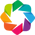

In [24]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)

In [25]:
links = pd.DataFrame(data['links'])
print(links.head(3))

   source  target  value
0       1       0      1
1       2       0      8
2       3       0     10


In [26]:
hv.Chord(links)

:Chord   [source,target]   (value)

In [27]:
nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')
nodes.data.head()

index  group             name
0      0      1           Myriel
1      1      1         Napoleon
2      2      1  Mlle.Baptistine
3      3      1     Mme.Magloire
4      4      1     CountessdeLo

In [28]:
chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

:Chord   [source,target]   (value)

In [29]:
import numpy as np

from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.les_mis import data

nodes = data['nodes']
names = [node['name'] for node in sorted(data['nodes'], key=lambda x: x['group'])]

N = len(nodes)
counts = np.zeros((N, N))
for link in data['links']:
    counts[link['source'], link['target']] = link['value']
    counts[link['target'], link['source']] = link['value']

colormap = ["#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
            "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"]

xname = []
yname = []
color = []
alpha = []
for i, node1 in enumerate(nodes):
    for j, node2 in enumerate(nodes):
        xname.append(node1['name'])
        yname.append(node2['name'])

        alpha.append(min(counts[i,j]/4.0, 0.9) + 0.1)

        if node1['group'] == node2['group']:
            color.append(colormap[node1['group']])
        else:
            color.append('lightgrey')

data=dict(
    xname=xname,
    yname=yname,
    colors=color,
    alphas=alpha,
    count=counts.flatten(),
)

p = figure(title="Les Mis Occurrences",
           x_axis_location="above", tools="hover,save",
           x_range=list(reversed(names)), y_range=names,
           tooltips = [('names', '@yname, @xname'), ('count', '@count')])

p.plot_width = 800
p.plot_height = 800
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

p.rect('xname', 'yname', 0.9, 0.9, source=data,
       color='colors', alpha='alphas', line_color=None,
       hover_line_color='black', hover_color='colors')


show(p) # show the plot